In [1]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load team files
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [3]:
# Get team ID based on team name
def get_team_id(team):
    for team in teams:
        if team['teamName'] == team:
            return team['teamId']
    return -1

# Get player ID based on player name
def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

In [4]:
#Get Nikola Jokic ID
get_player_id("Joel","Embiid")

203954

In [5]:
get_team_id('76ers')

-1

### Code to create bball court dimensions

In [6]:
# Function to draw basketball court
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, 
                                  facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    return ax

    

## Code to put as FOR LOOP

In [9]:
# create lists/array

p_name = np.array(["Shaq O'Neal", "Dwight Howard", "Nikola Jokic","Joel Embiid"])
p_id = np.array([406,2730,203999,203954])
t_id = np.array([1610612747,1610612753,1610612743,1610612755])
season = np.array(['2003-04','2010-11','2019-20','2020-21'])

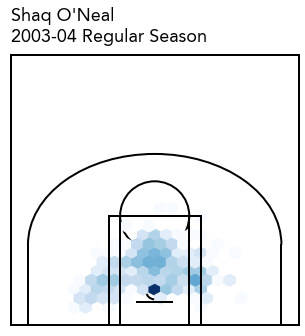

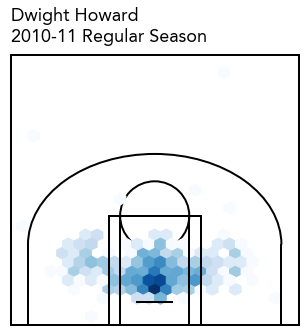

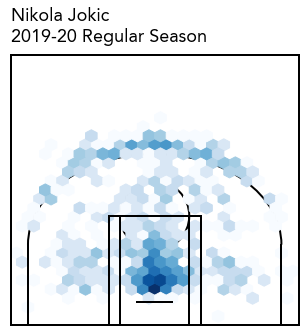

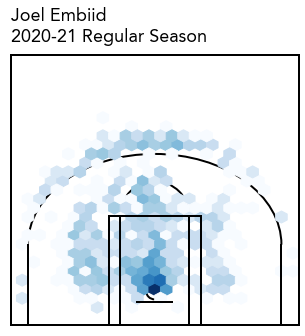

In [10]:
for name, pid, tid,s in zip(p_name, p_id, t_id, season):
    #Create JSON request for shot details
    shot_json = shotchartdetail.ShotChartDetail(
                team_id = tid,
                player_id = pid,
                context_measure_simple = 'FGA',
                season_nullable = s,
                season_type_all_star = 'Regular Season')

    # Load data into a Python dictionary
    shot_data = json.loads(shot_json.get_json())

    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]

    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']

    # Create pandas DataFrame
    data = pd.DataFrame(rows)
    data.columns = headers
#     data.head(20)
    
    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = 18
    mpl.rcParams['axes.linewidth'] = 2

    # Draw basketball court
    fig = plt.figure(figsize=(4, 3.76))
    ax = fig.add_axes([0, 0, 1, 1])
    ax = create_court(ax, 'black')

    # Plot hexbin of shots
    ax.hexbin(data['LOC_X'], data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940),bins='log', cmap='Blues')
    # Annotate player name and season
    ax.text(0, 1.05, f"{name}\n{s} Regular Season", transform=ax.transAxes, ha='left', va='baseline')# General plot parameters
        
    #to save fig
    fig.savefig(f'C:/Users/edowi/OneDrive/Desktop/Charts/{name}{s}_chart.png', bbox_inches = 'tight')